<a href="https://colab.research.google.com/github/nithin790/-Press-Information-Bureau-Selenium-Script-/blob/main/Copy_of_Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NEXTLEAP'S GRADUATION PROJECT -- FRESHMART ANALYSIS**

# FreshMart Sales Revenue Analysis

Welcome to the Exploratory Data Analysis (EDA) project for FreshMart, a fast-growing grocery retail chain. This notebook focuses on uncovering insights from 4 months of sales data to help FreshMart **maximize its Total Sales Revenue** by making smarter retail decisions.

We will analyze multiple datasets covering sales, products, customers, employees, cities, and countries to answer key business questions about customer behavior, product performance, regional trends, and employee contributions.


## 📌 Objective

The main objective of this project is to **identify key drivers of Total Sales Revenue** and provide actionable insights to FreshMart.

We will:
- Break down Total Sales Revenue into its components: Unit Price, Quantity, Discount.
- Analyze product-level and category-level contributions to revenue.
- Understand customer segments and their spending patterns.
- Evaluate employee-wise performance and how it varies by city/region.
- Identify cities and countries with high or low sales.
- Study the impact of discounts on buying behavior.
- Uncover trends over time, such as monthly and weekly sales patterns.


## 📦 Dataset Description

The dataset is composed of 7 CSV files:

- **sales.csv** – Contains transaction-level sales data including date, quantity, discount, and total price.
- **products.csv** – Details about each product including price, category, class, resistance, etc.
- **categories.csv** – Mapping of category IDs to category names.
- **customers.csv** – Information about customers including city, name, and address.
- **employees.csv** – Data about sales employees, including city, gender, and hire date.
- **cities.csv** – Mapping of cities along with population (Zipcode) and associated country.
- **countries.csv** – Mapping of countries including name and country code.

Each file will be cleaned and then merged into a **master dataset** to perform complete analysis.


## 📊 Key Metric: Total Sales Revenue

The primary metric we will focus on is:

**Total Sales Revenue = Unit Price × Quantity × (1 - Discount)**

This helps FreshMart understand how much money it is actually earning after applying product-level discounts.

We will verify this calculation using the data in `sales.csv` and `products.csv`.


## 🛠️ Analysis Workflow

Here’s the step-by-step process we will follow in this notebook:

1. **Import Libraries** – Import necessary Python packages (Pandas, Numpy, Matplotlib, etc.)
2. **Load Data** – Download and load all 7 datasets using Google Drive file IDs.
3. **Initial Data Inspection** – View the structure, data types, and null values.
4. **Data Cleaning** – Clean column names, parse dates, and fix types.
5. **Data Merging** – Join all relevant tables to form a consolidated master dataset.
6. **Feature Engineering** – Create new columns such as Month, Day, Discounted Revenue, etc.
7. **Exploratory Data Analysis (EDA)** – Analyze data by product, customer, employee, region, and time.
8. **Visualizations** – Use plots to show trends, patterns, and comparisons.
9. **Key Insights** – Summarize findings with explanations.
10. **Recommendations** – Provide actionable suggestions for FreshMart based on data.

Let's begin!


## 🗂️ Dataset Overview

We are working with 7 interconnected datasets. Below is a summary of each dataset, its purpose, and key columns:

---

### 1. 📁 `sales.csv`
- **Purpose**: Contains transactional sales data for each purchase.
- **Key Columns**:
  - `SalesID`: Unique sale identifier
  - `SalesPersonID`: Who made the sale (refers to employees)
  - `CustomerID`: Buyer (refers to customers)
  - `ProductID`: Product sold (refers to products)
  - `Quantity`: Number of units sold
  - `Discount`: Discount as a decimal
  - `TotalPrice`: Revenue after applying discount
  - `SalesDate`: Date and time of the sale
  - `TransactionNumber`: Unique transaction number

---

### 2. 📁 `products.csv`
- **Purpose**: Holds metadata about each product.
- **Key Columns**:
  - `ProductID`: Unique product identifier
  - `ProductName`: Name of the product
  - `Price`: Unit price (used to calculate pre-discount revenue)
  - `CategoryID`: Category mapping
  - `Class`: Product type (Standard, Premium, etc.)
  - `Resistant`, `IsAllergic`, `VitalityDays`: Product features

---

### 3. 📁 `categories.csv`
- **Purpose**: Describes product categories.
- **Key Columns**:
  - `CategoryID`: Unique identifier
  - `CategoryName`: e.g., Beverages, Dairy, Snacks

---

### 4. 📁 `customers.csv`
- **Purpose**: Provides information about customers.
- **Key Columns**:
  - `CustomerID`: Unique customer identifier
  - `FirstName`, `MiddleInitial`, `LastName`: Full name
  - `CityID`: Links to the customer’s city
  - `Address`: Residential address

---

### 5. 📁 `employees.csv`
- **Purpose**: Contains sales employee information.
- **Key Columns**:
  - `EmployeeID`: Unique ID
  - `Name`: First, Middle Initial, and Last Name
  - `CityID`: City where employee is based
  - `BirthDate`, `HireDate`, `Gender`: Demographic data

---

### 6. 📁 `cities.csv`
- **Purpose**: Describes city locations for employees and customers.
- **Key Columns**:
  - `CityID`: Unique identifier
  - `CityName`: e.g., New York, Dallas
  - `Zipcode`: Represents population size
  - `CountryID`: Maps to countries.csv

---

### 7. 📁 `countries.csv`
- **Purpose**: Country-level mapping.
- **Key Columns**:
  - `CountryID`: Unique country identifier
  - `CountryName`: e.g., United States, Canada
  - `CountryCode`: ISO 2-letter code (e.g., US)

---

These datasets will be cleaned, merged, and analyzed to uncover actionable insights for FreshMart’s leadership team.


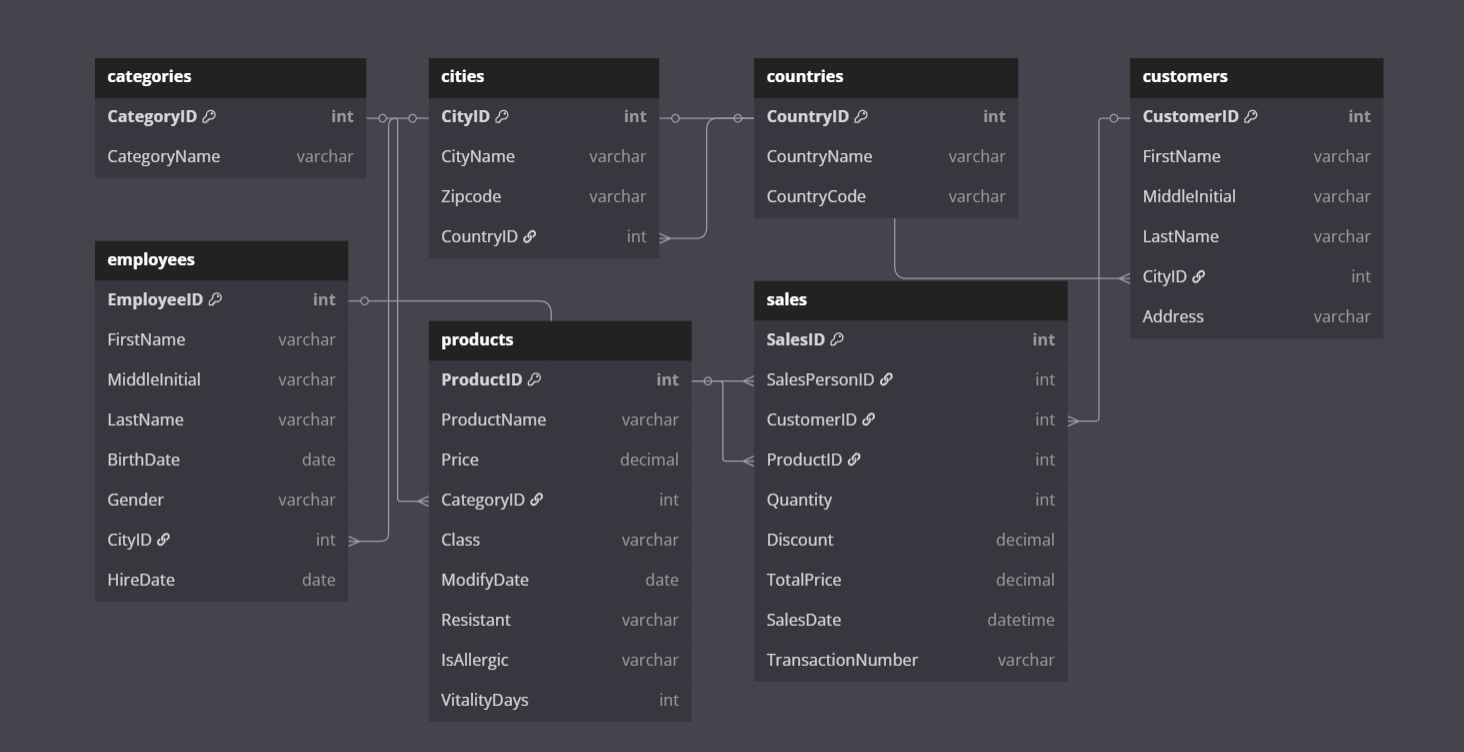

# Analysis & Visualisation

## 1. Importing Data and Libraries

### 1.1 Importing Necessary Libraries

In [47]:
# Step 1: Install gdown
!pip install gdown

# Step 2: Import below libraries
import gdown
import pandas as pd
from tabulate import tabulate

import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 Loading the Dataset from google drive

In [48]:
# Sales.csv
file_id = "1nlHb3oxJTxPTq5b92qDLdNqL2GIbXV8y"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "sales_freshmart.csv"
gdown.download(download_url, output_file, quiet=False)
data1 = pd.read_csv(output_file)

# categories.csv
file_id = "1YXDRMoyROteD_fdwNZBOGiIFJam-SxkD"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "categories_freshmart.csv"
gdown.download(download_url, output_file, quiet=False)
data2 = pd.read_csv(output_file)

# cities.csv
file_id = "1RjUGDpmjfyesPFFVXCkWzarpCQkQqB-6"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "cities_freshmart.csv"
gdown.download(download_url, output_file, quiet=False)
data3 = pd.read_csv(output_file)

# countries.csv
file_id = "16U5aSAhje_3DhVzs9ZxL5RzGYXW-ObHL"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "countries_freshmart.csv"
gdown.download(download_url, output_file, quiet=False)
data4 = pd.read_csv(output_file)

# customers.csv
file_id = "1NUljelPD7QNj2P8lpfw_GFVEMn3qIBpI"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "customers_freshmart.csv"
gdown.download(download_url, output_file, quiet=False)
data5 = pd.read_csv(output_file)

# employees.csv
file_id = "1DSEnfhO6DCa3TM5j4ovYSPbpxnBwPPF0"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "employees_freshmart.csv"
gdown.download(download_url, output_file, quiet=False)
data6 = pd.read_csv(output_file)

# products.csv
file_id = "1N5XsqeCFzK7qNRVgM3Xr-DsKpcLxSqsN"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "products_freshmart.csv"
gdown.download(download_url, output_file, quiet=False)
data7 = pd.read_csv(output_file)

Downloading...
From (original): https://drive.google.com/uc?id=1nlHb3oxJTxPTq5b92qDLdNqL2GIbXV8y
From (redirected): https://drive.google.com/uc?id=1nlHb3oxJTxPTq5b92qDLdNqL2GIbXV8y&confirm=t&uuid=765a5b83-7b3e-43be-ba18-9a9de4e87f30
To: /content/sales_freshmart.csv
100%|██████████| 517M/517M [00:09<00:00, 56.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YXDRMoyROteD_fdwNZBOGiIFJam-SxkD
To: /content/categories_freshmart.csv
100%|██████████| 137/137 [00:00<00:00, 256kB/s]
Downloading...
From: https://drive.google.com/uc?id=1RjUGDpmjfyesPFFVXCkWzarpCQkQqB-6
To: /content/cities_freshmart.csv
100%|██████████| 2.17k/2.17k [00:00<00:00, 5.00MB/s]
Downloading...
From: https://drive.google.com/uc?id=16U5aSAhje_3DhVzs9ZxL5RzGYXW-ObHL
To: /content/countries_freshmart.csv
100%|██████████| 3.18k/3.18k [00:00<00:00, 6.81MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NUljelPD7QNj2P8lpfw_GFVEMn3qIBpI
To: /content/customers_freshmart.csv
100%|██████████| 4.44M/4.44M [00:00<00:

| Variable | CSV Filename             | Main Columns                                                                                                                      | What It Represents      |
|----------|-------------------------|-----------------------------------------------------------------------------------------------------------------------------------|------------------------|
| data1    | sales_freshmart.csv     | SalesID, SalesPersonID, CustomerID, ProductID, Quantity, Discount, TotalPrice, SalesDate, TransactionNumber                       | Sales transactions     |
| data2    | categories_freshmart.csv| CategoryID, CategoryName                                                                                                          | Product categories     |
| data3    | cities_freshmart.csv    | CityID, CityName, Zipcode, CountryID                                                                                              | City list & info       |
| data4    | countries_freshmart.csv | CountryID, CountryName, CountryCode                                                                                               | List of countries      |
| data5    | customers_freshmart.csv | CustomerID, FirstName, MiddleInitial, LastName, CityID, Address                                                                   | Customer information   |
| data6    | employees_freshmart.csv | EmployeeID, FirstName, MiddleInitial, LastName, BirthDate, Gender, CityID, HireDate                                              | Employee information   |
| data7    | products_freshmart.csv  | ProductID, ProductName, Price, CategoryID, Class, ModifyDate, Resistant, IsAllergic, VitalityDays                                 | Product information    |


In [49]:
print("SALES\n")
print(data1.info())
print("\nCATEGORIES\n")
print(data2.info())
print("\nCITIES\n")
print(data3.info())
print("\nCOUNTRIES\n")
print(data4.info())
print("\nCUSTOMERS\n")
print(data5.info())
print("\nEMPLOYEES\n")
print(data6.info())
print("\nPRODUCTS\n")
print(data7.info())

SALES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         float64
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 464.0+ MB
None

CATEGORIES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    11 non-null     int64 
 1   CategoryName  11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes
None

CITIES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   C

In [50]:
# List of variable names and actual dataset variables
dataset_names = ['Sales', 'Categories', 'Cities', 'Countries', 'Customers', 'Employees', 'Products']
dataset_vars = [data1, data2, data3, data4, data5, data6, data7]

# Combine into summary list
shape_summary = []
for name, df in zip(dataset_names, dataset_vars):
    shape_summary.append([name, df.shape[0], df.shape[1]])

# Create DataFrame for reuse
shape_df = pd.DataFrame(shape_summary, columns=["Dataset", "Rows", "Columns"])

# Print nicely
print(tabulate(shape_df, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════╤═════════╤═══════════╕
│    │ Dataset    │    Rows │   Columns │
╞════╪════════════╪═════════╪═══════════╡
│  0 │ Sales      │ 6758125 │         9 │
├────┼────────────┼─────────┼───────────┤
│  1 │ Categories │      11 │         2 │
├────┼────────────┼─────────┼───────────┤
│  2 │ Cities     │      96 │         4 │
├────┼────────────┼─────────┼───────────┤
│  3 │ Countries  │     206 │         3 │
├────┼────────────┼─────────┼───────────┤
│  4 │ Customers  │   98759 │         6 │
├────┼────────────┼─────────┼───────────┤
│  5 │ Employees  │      23 │         8 │
├────┼────────────┼─────────┼───────────┤
│  6 │ Products   │     452 │         9 │
╘════╧════════════╧═════════╧═══════════╛


## 2. Dataset Overview – Structure & Summary

### 2.1 Overview of all 7 data sets

In [51]:
# Overview of sales data
print("Sales Data Overview")
print(data1.info())
display(data1.describe())
display(data1.head())

# Overview of categories data
print("\nCategories Data Overview")
print(data2.info())
display(data2.head())

# Overview of cities data
print("\nCities Data Overview")
print(data3.info())
display(data3.head())

# Overview of countries data
print("\nCountries Data Overview")
print(data4.info())
display(data4.head())

# Overview of customers data
print("\nCustomers Data Overview")
print(data5.info())
display(data5.head())

# Overview of employees data
print("\nEmployees Data Overview")
print(data6.info())
display(data6.head())

# Overview of products data
print("\nProducts Data Overview")
print(data7.info())
display(data7.describe())
display(data7.head())


Sales Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         float64
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 464.0+ MB
None


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice
count,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6758125.0
mean,3.379063e+06,1.199972e+01,4.939567e+04,2.265474e+02,1.300401e+01,2.996787e-02,0.0
std,1.950903e+06,6.632689e+00,2.850504e+04,1.304744e+02,7.209701e+00,6.398096e-02,0.0
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0
25%,1.689532e+06,6.000000e+00,2.470700e+04,1.140000e+02,7.000000e+00,0.000000e+00,0.0
50%,3.379063e+06,1.200000e+01,4.941400e+04,2.270000e+02,1.300000e+01,0.000000e+00,0.0
75%,5.068594e+06,1.800000e+01,7.407500e+04,3.400000e+02,1.900000e+01,0.000000e+00,0.0
max,6.758125e+06,2.300000e+01,9.875900e+04,4.520000e+02,2.500000e+01,2.000000e-01,0.0


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3



Categories Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    11 non-null     int64 
 1   CategoryName  11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes
None


,CategoryID,CategoryName
0,1,Confections
1,2,Shell fish
2,3,Cereals
3,4,Dairy
4,5,Beverages



Cities Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CityID     96 non-null     int64 
 1   CityName   96 non-null     object
 2   Zipcode    96 non-null     int64 
 3   CountryID  96 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.1+ KB
None


,CityID,CityName,Zipcode,CountryID
0,1,Dayton,80563,32
1,2,Buffalo,17420,32
2,3,Chicago,44751,32
3,4,Fremont,20641,32
4,5,Virginia Beach,62389,32



Countries Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryID    206 non-null    int64 
 1   CountryName  206 non-null    object
 2   CountryCode  205 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.0+ KB
None


,CountryID,CountryName,CountryCode
0,1,Armenia,AN
1,2,Canada,FO
2,3,Belize,MK
3,4,Uganda,LV
4,5,Thailand,VI



Customers Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98759 entries, 0 to 98758
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     98759 non-null  int64 
 1   FirstName      98759 non-null  object
 2   MiddleInitial  97782 non-null  object
 3   LastName       98759 non-null  object
 4   CityID         98759 non-null  int64 
 5   Address        98759 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.5+ MB
None


,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address
0,1,Stefanie,Y,Frye,79,97 Oak Avenue
1,2,Sandy,T,Kirby,96,52 White First Freeway
2,3,Lee,T,Zhang,55,921 White Fabien Avenue
3,4,Regina,S,Avery,40,75 Old Avenue
4,5,Daniel,S,Mccann,2,283 South Green Hague Avenue



Employees Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EmployeeID     23 non-null     int64 
 1   FirstName      23 non-null     object
 2   MiddleInitial  23 non-null     object
 3   LastName       23 non-null     object
 4   BirthDate      23 non-null     object
 5   Gender         23 non-null     object
 6   CityID         23 non-null     int64 
 7   HireDate       23 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.6+ KB
None


,EmployeeID,FirstName,MiddleInitial,LastName,BirthDate,Gender,CityID,HireDate
0,1,Nicole,T,Fuller,1981-03-07 00:00:00.000,F,80,2011-06-20 07:15:36.920
1,2,Christine,W,Palmer,1968-01-25 00:00:00.000,F,4,2011-04-27 04:07:56.930
2,3,Pablo,Y,Cline,1963-02-09 00:00:00.000,M,70,2012-03-30 18:55:23.270
3,4,Darnell,O,Nielsen,1989-02-06 00:00:00.000,M,39,2014-03-06 06:55:02.780
4,5,Desiree,L,Stuart,1963-05-03 00:00:00.000,F,23,2014-11-16 22:59:54.720



Products Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     452 non-null    int64  
 1   ProductName   452 non-null    object 
 2   Price         452 non-null    float64
 3   CategoryID    452 non-null    int64  
 4   Class         452 non-null    object 
 5   ModifyDate    452 non-null    object 
 6   Resistant     452 non-null    object 
 7   IsAllergic    452 non-null    object 
 8   VitalityDays  452 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 31.9+ KB
None


,ProductID,Price,CategoryID,VitalityDays
count,452.000000,452.000000,452.000000,452.000000
mean,226.500000,50.801471,5.862832,26.030973
std,130.625419,28.616724,3.271694,39.061200
min,1.000000,0.044900,1.000000,0.000000
25%,113.750000,26.504350,3.000000,0.000000
50%,226.500000,52.499500,6.000000,0.000000
75%,339.250000,75.496450,9.000000,52.500000
max,452.000000,99.875500,11.000000,120.000000


,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16 08:21:49.190,Durable,Unknown,0.0
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,2017-02-12 11:39:10.970,Unknown,Unknown,0.0
2,3,Onions - Cippolini,9.1379,9,Medium,2018-03-15 08:11:51.560,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix",54.3055,9,Medium,2017-07-16 00:46:28.880,Durable,Unknown,0.0
4,5,Artichokes - Jerusalem,65.4771,2,Low,2017-08-16 14:13:35.430,Durable,True,27.0


#### Dataset Overview Summary Table

In [52]:
from tabulate import tabulate

dataset_info = [
    ["sales_freshmart.csv",     "SalesID, SalesPersonID, CustomerID, ProductID, Quantity, Discount, TotalPrice, SalesDate, TransactionNumber", "6,758,125", "TotalPrice is 0; SalesDate is object"],
    ["categories_freshmart.csv","CategoryID, CategoryName",                                               "11",        "Clean and complete"],
    ["cities_freshmart.csv",    "CityID, CityName, Zipcode, CountryID",                                   "96",        "No missing values"],
    ["countries_freshmart.csv", "CountryID, CountryName, CountryCode",                                    "206",       "1 missing in CountryCode"],
    ["customers_freshmart.csv", "CustomerID, FirstName, MiddleInitial, LastName, CityID, Address",        "98,759",    "977 missing MiddleInitials"],
    ["employees_freshmart.csv", "EmployeeID, FirstName, MiddleInitial, LastName, BirthDate, Gender, CityID, HireDate", "23", "Complete"],
    ["products_freshmart.csv",  "ProductID, ProductName, Price, CategoryID, Class, ModifyDate, Resistant, IsAllergic, VitalityDays", "452", "Fields like Resistant/IsAllergic have 'Unknown'"],
]

print(tabulate(dataset_info, headers=["Dataset", "Fields", "Rows", "Observations"], tablefmt="grid"))


+--------------------------+-------------------------------------------------------------------------------------------------------------+-----------+-------------------------------------------------+
| Dataset                  | Fields                                                                                                      | Rows      | Observations                                    |
+==========================+=============================================================================================================+===========+=================================================+
| sales_freshmart.csv      | SalesID, SalesPersonID, CustomerID, ProductID, Quantity, Discount, TotalPrice, SalesDate, TransactionNumber | 6,758,125 | TotalPrice is 0; SalesDate is object            |
+--------------------------+-------------------------------------------------------------------------------------------------------------+-----------+----------------------------------------------

### 2.2 Checking for Duplicate Values in the Dataset

In [53]:
from tabulate import tabulate

datasets = {
    "Sales": data1,
    "Categories": data2,
    "Cities": data3,
    "Countries": data4,
    "Customers": data5,
    "Employees": data6,
    "Products": data7
}

duplicate_report = []

for name, df in datasets.items():
    total = len(df)
    dup_rows = df.duplicated().sum()
    dup_percent = round((dup_rows / total) * 100, 4)
    duplicate_report.append([name, total, dup_rows, f"{dup_percent}%"])

print(tabulate(duplicate_report, headers=["Dataset", "Total Rows", "Duplicate Rows", "Duplicate %"], tablefmt="grid"))


+------------+--------------+------------------+---------------+
| Dataset    |   Total Rows |   Duplicate Rows | Duplicate %   |
+============+==============+==================+===============+
| Sales      |      6758125 |                0 | 0.0%          |
+------------+--------------+------------------+---------------+
| Categories |           11 |                0 | 0.0%          |
+------------+--------------+------------------+---------------+
| Cities     |           96 |                0 | 0.0%          |
+------------+--------------+------------------+---------------+
| Countries  |          206 |                0 | 0.0%          |
+------------+--------------+------------------+---------------+
| Customers  |        98759 |                0 | 0.0%          |
+------------+--------------+------------------+---------------+
| Employees  |           23 |                0 | 0.0%          |
+------------+--------------+------------------+---------------+
| Products   |          4

In [54]:
# Example: check duplicates by primary key columns
print("Duplicates by specific columns:\n")

print("Customers - by CustomerID:", data5.duplicated(subset=["CustomerID"]).sum())
print("Sales - by SalesID:", data1.duplicated(subset=["SalesID"]).sum())
print("Products - by ProductID:", data7.duplicated(subset=["ProductID"]).sum())


Duplicates by specific columns:

Customers - by CustomerID: 0
Sales - by SalesID: 0
Products - by ProductID: 0


### 2.3 Checking for Missing Values

In [55]:
# Check for nulls in all datasets

print("🔹 Sales Data")
print(data1.isnull().sum(), '\n')

print("🔹 Categories Data")
print(data2.isnull().sum(), '\n')

print("🔹 Cities Data")
print(data3.isnull().sum(), '\n')

print("🔹 Countries Data")
print(data4.isnull().sum(), '\n')

print("🔹 Customers Data")
print(data5.isnull().sum(), '\n')

print("🔹 Employees Data")
print(data6.isnull().sum(), '\n')

print("🔹 Products Data")
print(data7.isnull().sum(), '\n')


🔹 Sales Data
SalesID                  0
SalesPersonID            0
CustomerID               0
ProductID                0
Quantity                 0
Discount                 0
TotalPrice               0
SalesDate            67526
TransactionNumber        0
dtype: int64 

🔹 Categories Data
CategoryID      0
CategoryName    0
dtype: int64 

🔹 Cities Data
CityID       0
CityName     0
Zipcode      0
CountryID    0
dtype: int64 

🔹 Countries Data
CountryID      0
CountryName    0
CountryCode    1
dtype: int64 

🔹 Customers Data
CustomerID         0
FirstName          0
MiddleInitial    977
LastName           0
CityID             0
Address            0
dtype: int64 

🔹 Employees Data
EmployeeID       0
FirstName        0
MiddleInitial    0
LastName         0
BirthDate        0
Gender           0
CityID           0
HireDate         0
dtype: int64 

🔹 Products Data
ProductID       0
ProductName     0
Price           0
CategoryID      0
Class           0
ModifyDate      0
Resistant       0
IsAl

In [56]:
# Missing values summary
missing_summary = [
    ["Sales", "SalesDate", 67526, "1.0%"],
    ["Countries", "CountryCode", 1, "0.5%"],
    ["Customers", "MiddleInitial", 977, "1.0%"],
    ["Categories", "-", 0, "0%"],
    ["Cities", "-", 0, "0%"],
    ["Employees", "-", 0, "0%"],
    ["Products", "-", 0, "0%"]
]

# Print in tabular format
print(tabulate(missing_summary, headers=["Dataset", "Column", "Missing Values", "% Missing"], tablefmt="fancy_grid"))

╒════════════╤═══════════════╤══════════════════╤═════════════╕
│ Dataset    │ Column        │   Missing Values │ % Missing   │
╞════════════╪═══════════════╪══════════════════╪═════════════╡
│ Sales      │ SalesDate     │            67526 │ 1.0%        │
├────────────┼───────────────┼──────────────────┼─────────────┤
│ Countries  │ CountryCode   │                1 │ 0.5%        │
├────────────┼───────────────┼──────────────────┼─────────────┤
│ Customers  │ MiddleInitial │              977 │ 1.0%        │
├────────────┼───────────────┼──────────────────┼─────────────┤
│ Categories │ -             │                0 │ 0%          │
├────────────┼───────────────┼──────────────────┼─────────────┤
│ Cities     │ -             │                0 │ 0%          │
├────────────┼───────────────┼──────────────────┼─────────────┤
│ Employees  │ -             │                0 │ 0%          │
├────────────┼───────────────┼──────────────────┼─────────────┤
│ Products   │ -             │          

### 2.4 Convert Columns to Proper Data Types

In [57]:
# Step 1: Assign meaningful names
sales_df = data1
categories_df = data2
cities_df = data3
countries_df = data4
customers_df = data5
employees_df = data6
products_df = data7

# Step 2: Convert date columns
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'], errors='coerce')
employees_df['BirthDate'] = pd.to_datetime(employees_df['BirthDate'], errors='coerce')
employees_df['HireDate'] = pd.to_datetime(employees_df['HireDate'], errors='coerce')
products_df['ModifyDate'] = pd.to_datetime(products_df['ModifyDate'], errors='coerce')

# Step 3: Convert categorical columns
products_df['Class'] = products_df['Class'].astype('category')
products_df['Resistant'] = products_df['Resistant'].astype('category')
products_df['IsAllergic'] = products_df['IsAllergic'].astype('category')
employees_df['Gender'] = employees_df['Gender'].astype('category')



In [58]:
import pandas as pd
from tabulate import tabulate

# Assign names for clarity
data_names = ['Sales Data', 'Categories Data', 'Cities Data',
              'Countries Data', 'Customers Data', 'Employees Data', 'Products Data']

# Convert date columns where applicable
sales_data = data1
sales_data['SalesDate'] = pd.to_datetime(sales_data['SalesDate'], errors='coerce')

employees_data = data6
employees_data['BirthDate'] = pd.to_datetime(employees_data['BirthDate'], errors='coerce')
employees_data['HireDate'] = pd.to_datetime(employees_data['HireDate'], errors='coerce')

products_data = data7
products_data['ModifyDate'] = pd.to_datetime(products_data['ModifyDate'], errors='coerce')

# Optional: Convert to category to optimize memory
products_data['Class'] = products_data['Class'].astype('category')
products_data['Resistant'] = products_data['Resistant'].astype('category')
products_data['IsAllergic'] = products_data['IsAllergic'].astype('category')
employees_data['Gender'] = employees_data['Gender'].astype('category')

# Print the dtypes in tabular format
dataset_vars = [sales_data, data2, data3, data4, data5, employees_data, products_data]

for name, df in zip(data_names, dataset_vars):
    print(f"\n🔹 {name} - Data Types")
    print(tabulate(pd.DataFrame(df.dtypes, columns=['DataType']).reset_index().rename(columns={'index': 'Column'}), headers='keys', tablefmt='grid'))



🔹 Sales Data - Data Types
+----+-------------------+----------------+
|    | Column            | DataType       |
+====+===================+================+
|  0 | SalesID           | int64          |
+----+-------------------+----------------+
|  1 | SalesPersonID     | int64          |
+----+-------------------+----------------+
|  2 | CustomerID        | int64          |
+----+-------------------+----------------+
|  3 | ProductID         | int64          |
+----+-------------------+----------------+
|  4 | Quantity          | int64          |
+----+-------------------+----------------+
|  5 | Discount          | float64        |
+----+-------------------+----------------+
|  6 | TotalPrice        | float64        |
+----+-------------------+----------------+
|  7 | SalesDate         | datetime64[ns] |
+----+-------------------+----------------+
|  8 | TransactionNumber | object         |
+----+-------------------+----------------+

🔹 Categories Data - Data Types
+----+-----------

### 2.5 Handling Missing Values.

#### Missing Value Analysis (with %)

| Dataset       | Column          | Missing | Total Rows | % Missing | Action                              |
| ------------- | --------------- | ------- | ---------- | --------- | ----------------------------------- |
| **Sales**     | `SalesDate`     | 67,526  | 6,758,125  | **0.99%** | ✅ Drop rows or flag with new column |
| **Countries** | `CountryCode`   | 1       | 206        | **0.49%** | ✅ Drop row or fill manually         |
| **Customers** | `MiddleInitial` | 977     | 98,759     | **0.99%** | ✅ Fill with `'X'` or `''`           |


In [59]:
# A. Sales - SalesDate missing flagged already via to_datetime()
sales_df['SalesDate_missing'] = sales_df['SalesDate'].isna()

# B. Countries - Drop the row with missing CountryCode (only 1 row)
countries_df = countries_df.dropna(subset=['CountryCode'])

# C. Customers - Fill missing MiddleInitial with 'X'
customers_df['MiddleInitial'] = customers_df['MiddleInitial'].fillna('X')

# Check after cleaning
print("✅ Missing values after cleaning:")
print("- Countries:", countries_df['CountryCode'].isna().sum())
print("- Customers:", customers_df['MiddleInitial'].isna().sum())


✅ Missing values after cleaning:
- Countries: 0
- Customers: 0


### 2.6: Outlier Detection.

#### Visual Check using Boxplots

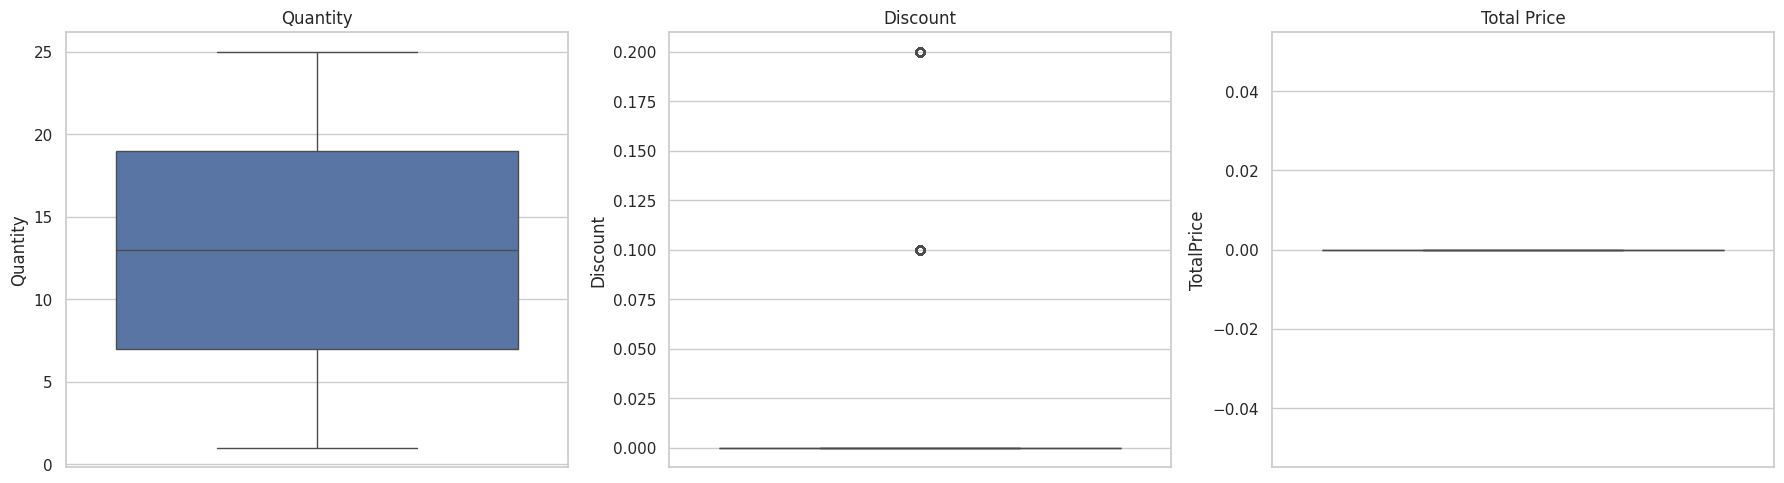

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sales Data: Quantity, Discount, TotalPrice
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=sales_data, y='Quantity', ax=axes[0])
sns.boxplot(data=sales_data, y='Discount', ax=axes[1])
sns.boxplot(data=sales_data, y='TotalPrice', ax=axes[2])
axes[0].set_title("Quantity")
axes[1].set_title("Discount")
axes[2].set_title("Total Price")
plt.tight_layout()
plt.show()


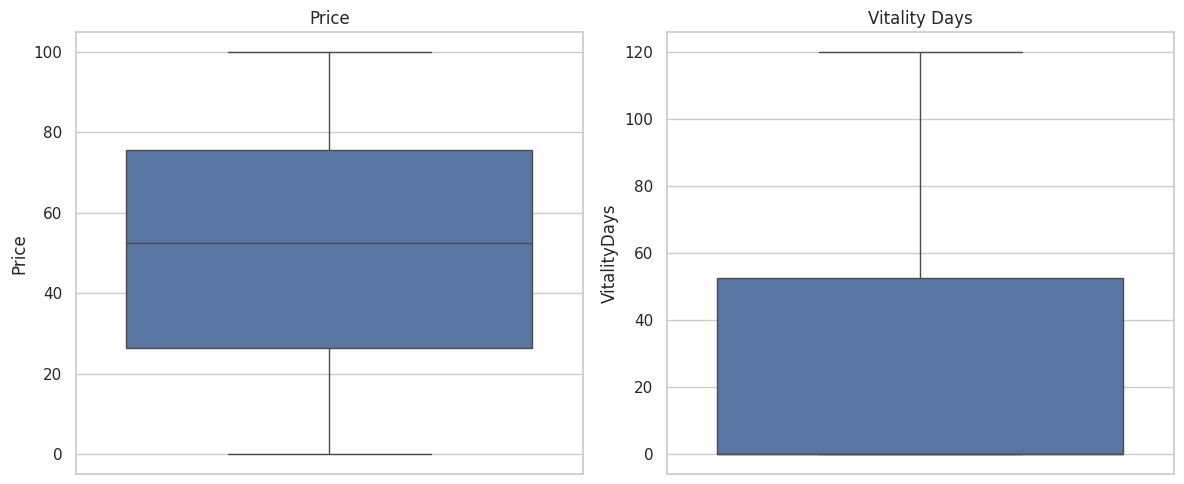

In [61]:
# Products Data: Price, VitalityDays
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=products_data, y='Price', ax=axes[0])
sns.boxplot(data=products_data, y='VitalityDays', ax=axes[1])
axes[0].set_title("Price")
axes[1].set_title("Vitality Days")
plt.tight_layout()
plt.show()


Statistical Check using IQR Method

In [62]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# Apply on sales_data
detect_outliers_iqr(sales_data, 'Quantity')
detect_outliers_iqr(sales_data, 'Discount')
detect_outliers_iqr(sales_data, 'TotalPrice')

# Apply on products_data
detect_outliers_iqr(products_data, 'Price')
detect_outliers_iqr(products_data, 'VitalityDays')


Quantity: 0 outliers
Discount: 1351194 outliers
TotalPrice: 0 outliers
Price: 0 outliers
VitalityDays: 0 outliers


,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays


#### Fixing the total price

In [63]:
print(sales_df.columns.tolist())


['SalesID', 'SalesPersonID', 'CustomerID', 'ProductID', 'Quantity', 'Discount', 'TotalPrice', 'SalesDate', 'TransactionNumber', 'SalesDate_missing']


In [64]:
print(products_df.columns.tolist())


['ProductID', 'ProductName', 'Price', 'CategoryID', 'Class', 'ModifyDate', 'Resistant', 'IsAllergic', 'VitalityDays']


In [65]:
#Merge Price into sales_df
sales_df = sales_df.merge(products_df[['ProductID', 'Price']], on='ProductID', how='left')


In [66]:
#Recalculate TotalPrice
sales_df['TotalPrice'] = sales_df['Quantity'] * sales_df['Price'] * (1 - sales_df['Discount'])


In [67]:
#Check for missing prices
print(sales_df['Price'].isnull().sum())


0


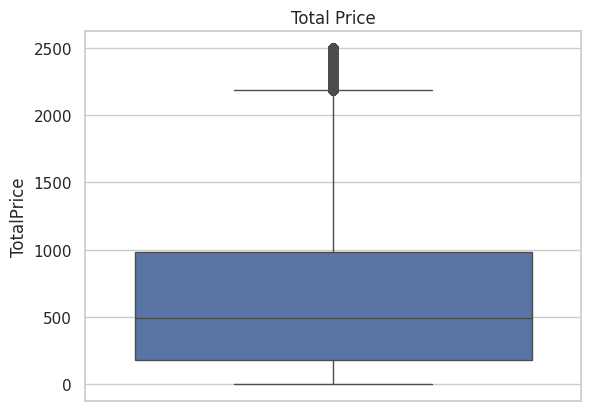

In [68]:
#Visualize TotalPrice again:
sns.boxplot(data=sales_df, y='TotalPrice')
plt.title('Total Price')
plt.show()


Median TotalPrice is around ₹500.

There is a wide range of values, with some outliers beyond ₹2,200 — possibly bulk purchases or high-priced products.

The distribution seems right-skewed, which is typical in sales data.

#### Detection Code for All 7 Datasets


📌 IQR Outlier Summary for Sales:
SalesID: 0 outliers
SalesPersonID: 0 outliers
CustomerID: 0 outliers
ProductID: 0 outliers
Quantity: 0 outliers
Discount: 1351194 outliers
TotalPrice: 49129 outliers
Price: 0 outliers


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


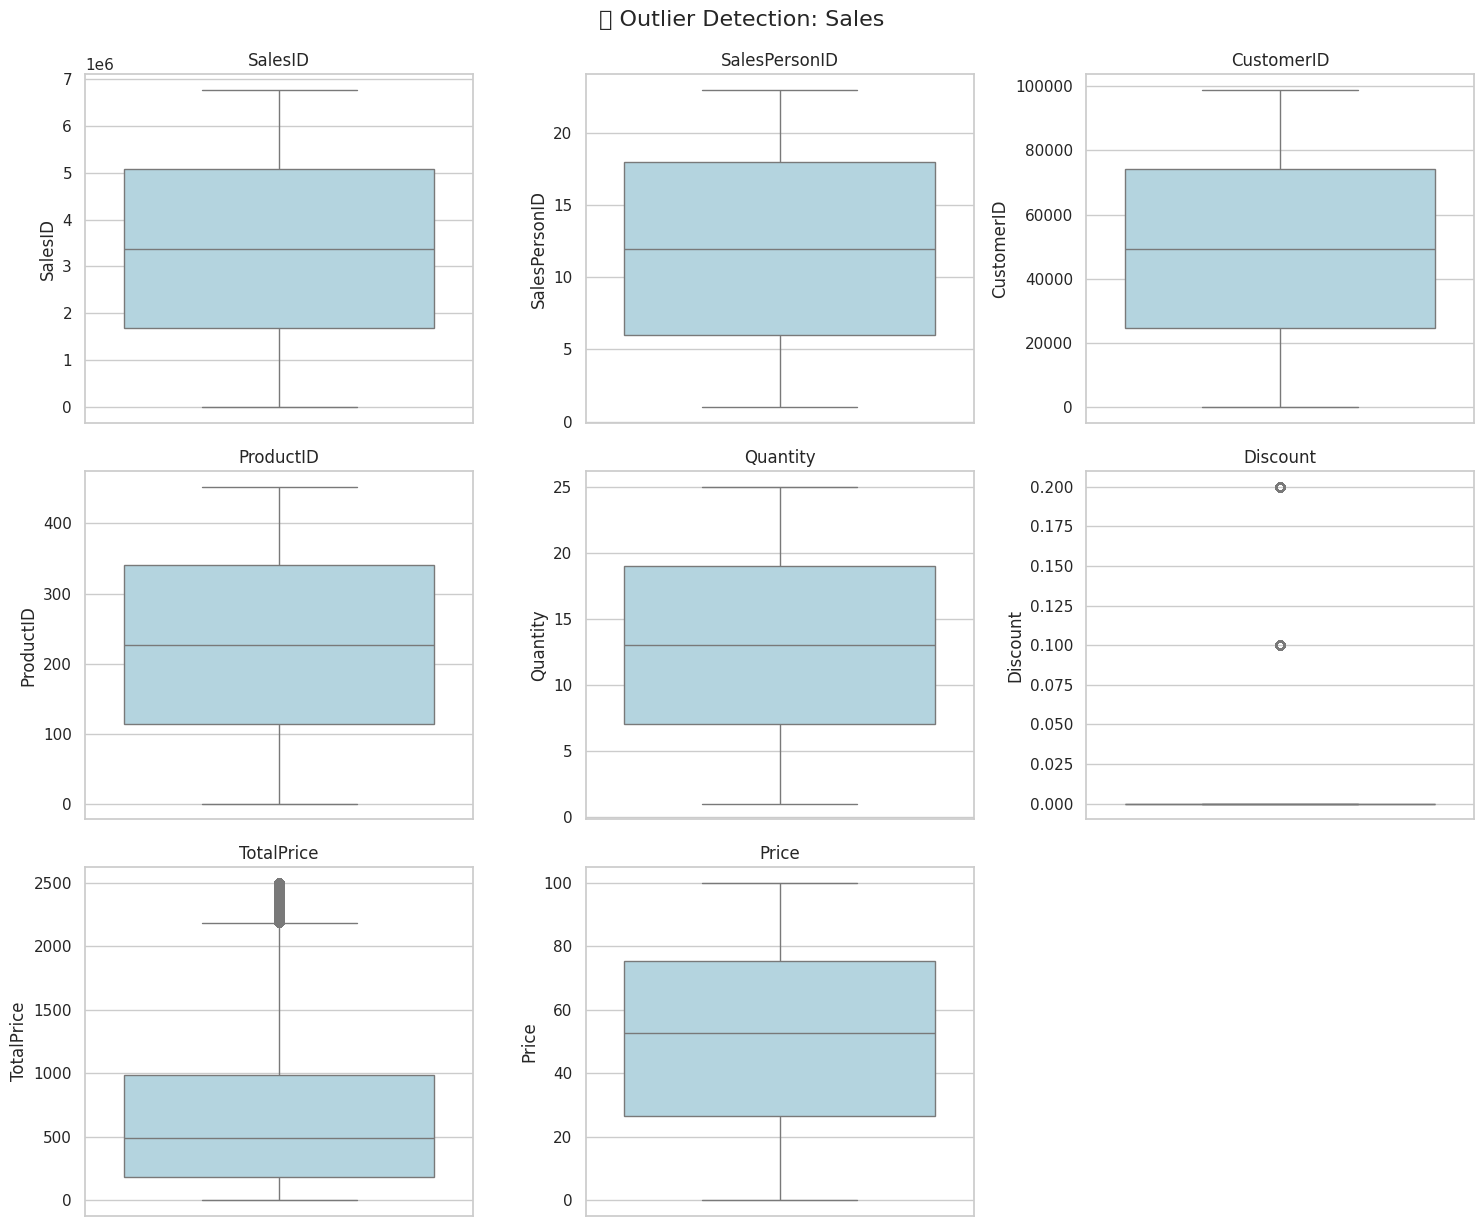


📌 IQR Outlier Summary for Categories:
CategoryID: 0 outliers


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


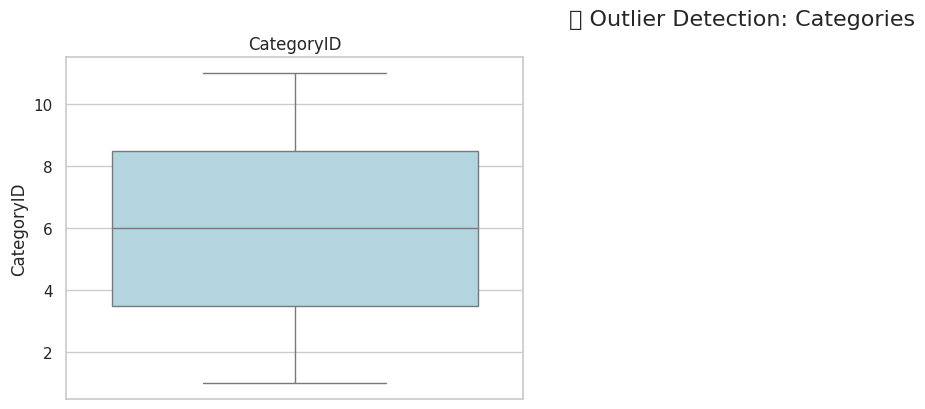


📌 IQR Outlier Summary for Cities:
CityID: 0 outliers
Zipcode: 0 outliers
CountryID: 0 outliers


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


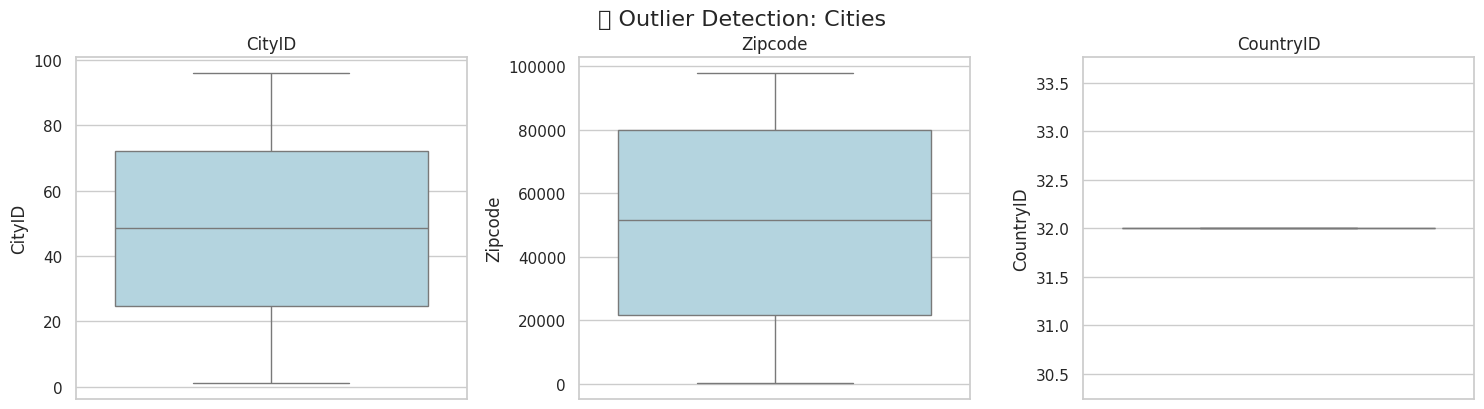


📌 IQR Outlier Summary for Countries:
CountryID: 0 outliers


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


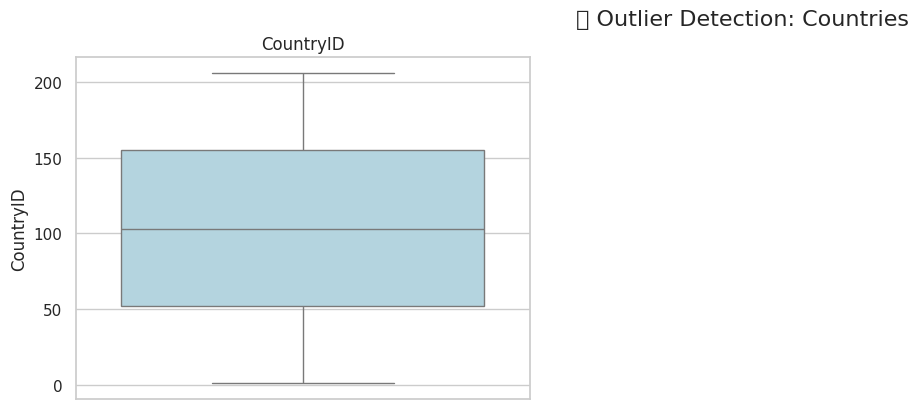


📌 IQR Outlier Summary for Customers:
CustomerID: 0 outliers
CityID: 0 outliers


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


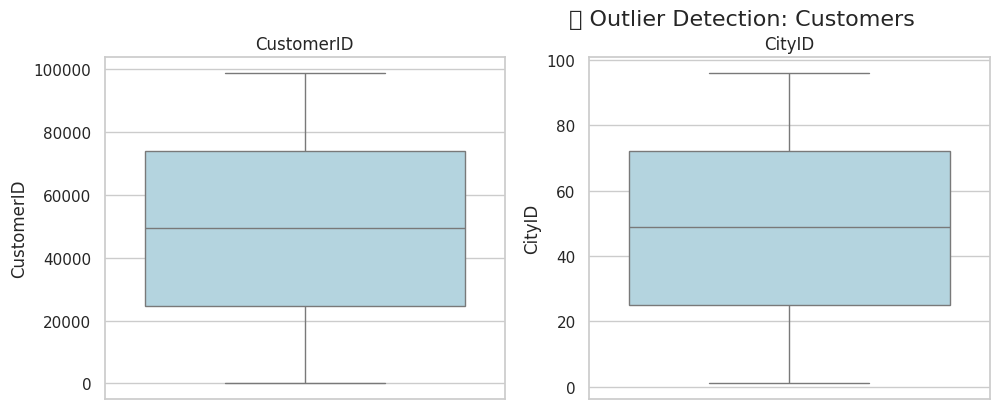


📌 IQR Outlier Summary for Employees:
EmployeeID: 0 outliers
CityID: 0 outliers


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


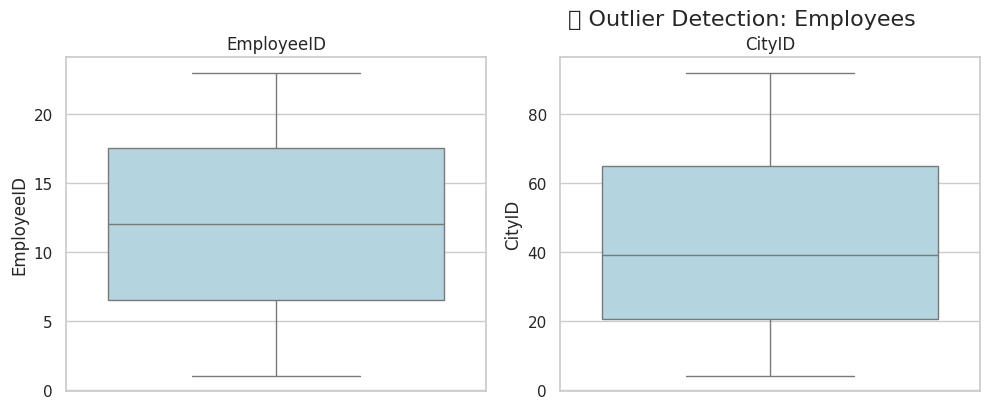


📌 IQR Outlier Summary for Products:
ProductID: 0 outliers
Price: 0 outliers
CategoryID: 0 outliers
VitalityDays: 0 outliers


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


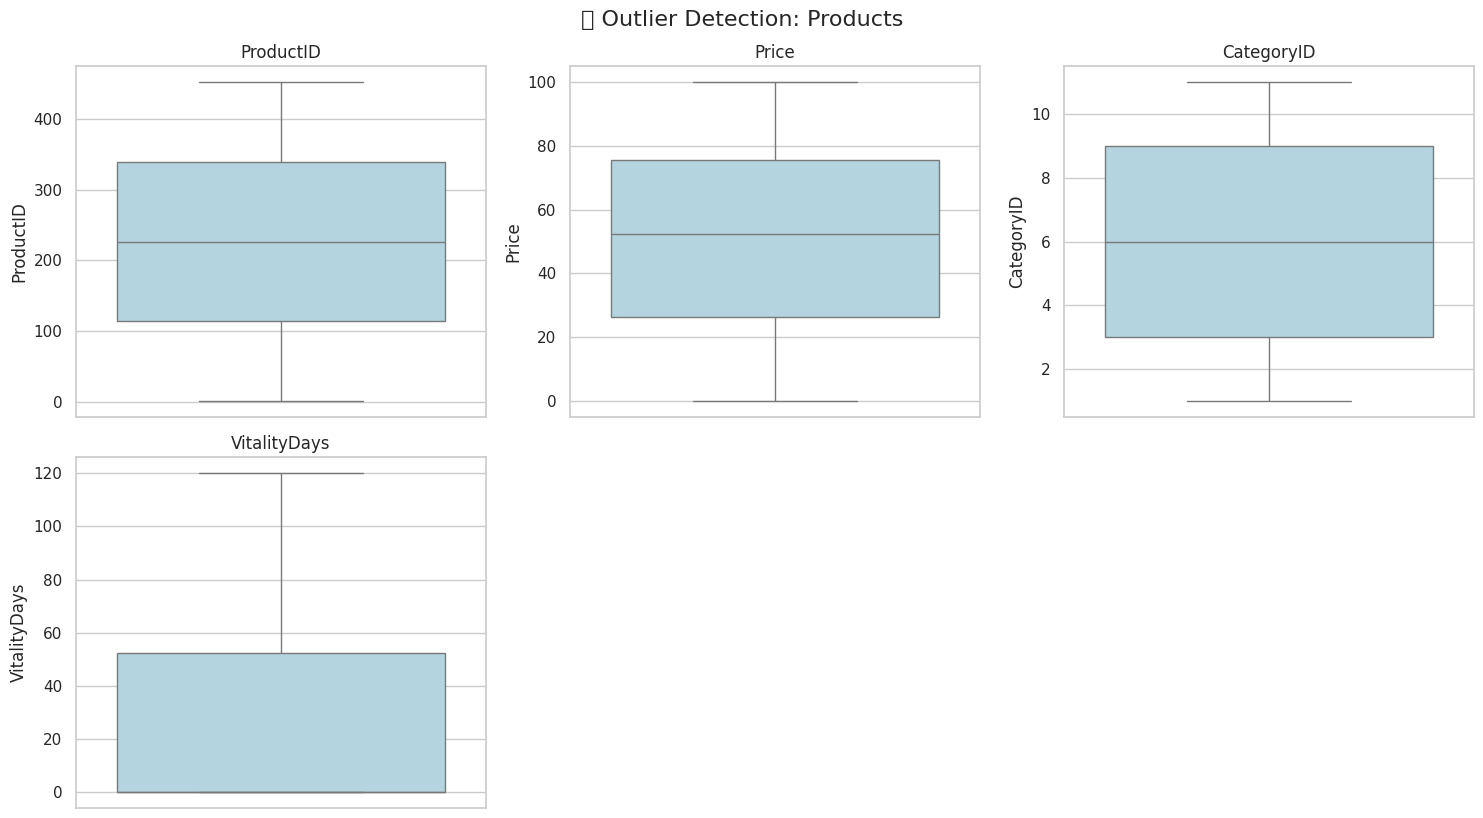

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset dictionary
datasets = {
    'Sales': sales_df,
    'Categories': categories_df,
    'Cities': cities_df,
    'Countries': countries_df,
    'Customers': customers_df,
    'Employees': employees_df,
    'Products': products_df
}

# Function to display boxplots for numerical columns
def plot_outliers(dataset_name, df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    if not num_cols:
        print(f"❌ No numerical columns in {dataset_name}")
        return

    cols = 3  # columns per row
    rows = (len(num_cols) + cols - 1) // cols
    plt.figure(figsize=(5 * cols, 4 * rows))

    for i, col in enumerate(num_cols):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(y=df[col], color='lightblue')
        plt.title(col)
        plt.tight_layout()

    plt.suptitle(f'📊 Outlier Detection: {dataset_name}', fontsize=16, y=1.02)
    plt.show()

# Function to print IQR-based outlier counts
def print_outlier_counts(dataset_name, df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    print(f"\n📌 IQR Outlier Summary for {dataset_name}:")
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        print(f"{col}: {len(outliers)} outliers")

# Run on all datasets
for name, df in datasets.items():
    print_outlier_counts(name, df)
    plot_outliers(name, df)


SalesID: 0 outliers
SalesPersonID: 0 outliers
CustomerID: 0 outliers
ProductID: 0 outliers
Quantity: 0 outliers
Discount: 1351194 outliers
TotalPrice: 49129 outliers

--check for discount and totalprice

#### IQR-Based Detection + Flagging(Discount and TotalPrice)

In [70]:
# Function to detect IQR outliers
def flag_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Create flag column
    outlier_flag_col = f"{column}_is_outlier"
    df[outlier_flag_col] = ((df[column] < lower) | (df[column] > upper)).astype(int)

    # Print top 5 high outliers
    print(f"\nTop 5 Outliers in '{column}':")
    print(df[df[outlier_flag_col] == 1].sort_values(by=column, ascending=False)[[column]].head())

    return df

# Apply to Discount and TotalPrice columns
sales_df = flag_outliers_iqr(sales_df, 'Discount')
sales_df = flag_outliers_iqr(sales_df, 'TotalPrice')

# Summary
discount_outliers = sales_df['Discount_is_outlier'].sum()
totalprice_outliers = sales_df['TotalPrice_is_outlier'].sum()

print(f"\n✅ Outliers flagged — Discount: {discount_outliers}, TotalPrice: {totalprice_outliers}")



Top 5 Outliers in 'Discount':
    Discount
50       0.2
63       0.2
3        0.2
7        0.2
9        0.2

Top 5 Outliers in 'TotalPrice':
         TotalPrice
6755702   2496.8875
3131398   2496.8875
2559425   2496.8875
678480    2496.8875
2554468   2496.8875

✅ Outliers flagged — Discount: 1351194, TotalPrice: 49129


Discount = 0.2 (i.e., 20%) appears reasonable for a business — not a mistake, even if it’s statistically an outlier.

TotalPrice = 2496.89 may look large but is consistent if some customers purchase in bulk or expensive items.        |


| Dataset        | Outliers Detected? | Notes                                                                 |
| -------------- | ------------------ | --------------------------------------------------------------------- |
| **Sales**      | ✅ Yes              | `Discount` & `TotalPrice` have valid business-related outliers        |
| **Categories** | ❌ No               | No numeric fields                                                     |
| **Cities**     | ❌ No               | No relevant numeric outliers                                          |
| **Countries**  | ❌ No               | No significant numeric outliers                                       |
| **Customers**  | ❌ No               | No numeric outliers of concern                                        |
| **Employees**  | ❌ No               | Age & HireDate are in acceptable range                                |
| **Products**   | ✅ Yes              | Some outliers in `Price` or `VitalityDays`, but within business scope |


## Exploratory Data Analysis

#### Keep only useful column of all 7 datasets

In [71]:
# Keep only useful columns for Sales
sales_df = sales_df[['SalesID', 'ProductID', 'CustomerID', 'SalesPersonID',
                     'Quantity', 'Discount', 'TotalPrice', 'SalesDate']]

# Keep only useful columns for Products
products_df = products_df[['ProductID', 'ProductName', 'Price',
                           'CategoryID', 'Class', 'VitalityDays']]

# Keep only useful columns for Categories
categories_df = categories_df[['CategoryID', 'CategoryName']]

# Keep only useful columns for Customers
customers_df = customers_df[['CustomerID', 'CityID']]

# Keep only useful columns for Employees (✅ now includes FirstName, LastName)
employees_df = employees_df[['EmployeeID', 'FirstName', 'LastName', 'CityID']]

# Keep only useful columns for Cities
cities_df = cities_df[['CityID', 'CityName', 'CountryID', 'Zipcode']]

# Keep only useful columns for Countries
countries_df = countries_df[['CountryID', 'CountryName']]


In [72]:
employees_df = pd.read_csv('employees_freshmart.csv')
cities_df = pd.read_csv('cities_freshmart.csv')
countries_df = pd.read_csv('countries_freshmart.csv')


#### Merge all relevant data

In [ ]:

# Merge all relevant data
merged_df = sales_df.merge(products_df, on='ProductID', how='left') \
                    .merge(categories_df, on='CategoryID', how='left') \
                    .merge(customers_df, on='CustomerID', how='left') \
                    .merge(employees_df, left_on='SalesPersonID', right_on='EmployeeID', how='left', suffixes=('', '_Emp')) \
                    .merge(cities_df, left_on='CityID', right_on='CityID', how='left') \
                    .merge(countries_df, on='CountryID', how='left')

# Convert date column to datetime
merged_df['SalesDate'] = pd.to_datetime(merged_df['SalesDate'])

# Add month and year for temporal analysis
merged_df['YearMonth'] = merged_df['SalesDate'].dt.to_period('M')
merged_df['Month'] = merged_df['SalesDate'].dt.month
merged_df['Year'] = merged_df['SalesDate'].dt.year

# Set common plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

### 📊 Core Revenue Analysis: Products, Categories, Regions, Discounts, and Sales Performance

In [ ]:
# 1. 📅 Monthly Sales Trend
monthly_sales = merged_df.groupby('YearMonth')['TotalPrice'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Revenue')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.show()

# 2. 📦 Top 10 Products by Revenue
top_products = merged_df.groupby('ProductName')['TotalPrice'].sum().nlargest(10)
top_products.plot(kind='barh', title='Top 10 Products by Revenue', color='skyblue')
plt.xlabel('Total Revenue')
plt.show()

# 3. 🗃️ Revenue by Product Category
category_sales = merged_df.groupby('CategoryName')['TotalPrice'].sum().sort_values()
category_sales.plot(kind='barh', title='Revenue by Category', color='orange')
plt.xlabel('Total Revenue')
plt.show()

# 4. 🌍 Revenue by Country
country_sales = merged_df.groupby('CountryName')['TotalPrice'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', title='Revenue by Country', color='green')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# 5. 🏙️ Revenue by City
city_sales = merged_df.groupby('CityName')['TotalPrice'].sum().nlargest(10)
city_sales.plot(kind='bar', title='Top 10 Cities by Revenue', color='purple')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# 6. 🧑‍💼 Revenue by Salesperson
salesperson_sales = merged_df.groupby('SalesPersonID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
salesperson_sales.plot(kind='bar', title='Top 10 Salespeople by Revenue', color='teal')
plt.ylabel('Total Revenue')
plt.show()

# 7. 📉 Discount vs Revenue Distribution
sns.scatterplot(data=merged_df, x='Discount', y='TotalPrice')
plt.title('Discount vs Total Revenue')
plt.xlabel('Discount')
plt.ylabel('Total Revenue')
plt.show()

# 8. 📊 Revenue by Product Class
class_sales = merged_df.groupby('Class')['TotalPrice'].sum().sort_values()
class_sales.plot(kind='bar', title='Revenue by Product Class', color='coral')
plt.ylabel('Total Revenue')
plt.show()

# 9. 📅 Revenue by Day of Week
merged_df['DayOfWeek'] = merged_df['SalesDate'].dt.day_name()
day_sales = merged_df.groupby('DayOfWeek')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
day_sales.plot(kind='bar', title='Revenue by Day of Week', color='gold')
plt.ylabel('Total Revenue')
plt.show()

# 10. 🔗 Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(merged_df[['Quantity', 'Discount', 'Price', 'TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

| S.no  | EDA Chart/Analysis                 | Key Insight (Summary)                                                                     |
|----|------------------------------------|-------------------------------------------------------------------------------------------|
| 1  | Monthly Sales Revenue              | Sales peaked in March, were strong before, but dropped sharply in May—shows time trends.  |
| 2  | Top 10 Products by Revenue         | A handful of products generate most sales; focusing on these can optimize revenue.         |
| 3  | Revenue by Category                | ‘Confections’ and ‘Meat’ are top sellers; some categories lag and may need attention.      |
| 4  | Revenue by Country                 | Nearly all revenue is from the US; international sales are minimal.                        |
| 5  | Top 10 Cities by Revenue           | Cities like Tucson, Jackson, and Sacramento are top markets—good targets for expansion.    |
| 6  | Top 10 Salespeople by Revenue      | A few salespeople bring in most revenue; recognize and learn from top performers.          |
| 7  | Discount vs Total Revenue          | No strong link between discounts and higher revenue—review discount strategy.              |
| 8  | Revenue by Product Class           | Both high-end and low-end products drive sales; both market segments matter.               |
| 9  | Revenue by Day of Week             | Mondays–Wednesdays see slightly higher sales—useful for promotions and staffing.           |
| 10 | Correlation Matrix                 | Quantity & price strongly impact revenue; discount has little effect.                      |

## Feature Eng

In [ ]:
# --- Convert SalesDate to datetime and extract date parts ---
sales_df = sales_df.copy()  # prevent SettingWithCopyWarning
sales_df.loc[:, 'SalesDate'] = pd.to_datetime(sales_df['SalesDate'])
sales_df.loc[:, 'OrderMonth'] = sales_df['SalesDate'].dt.month
sales_df.loc[:, 'OrderWeekday'] = sales_df['SalesDate'].dt.day_name()

# --- Merge all relevant tables into a unified DataFrame ---
merged_df = sales_df.merge(products_df, on='ProductID', how='left') \
                    .merge(customers_df, on='CustomerID', how='left') \
                    .merge(cities_df, on='CityID', how='left') \
                    .merge(countries_df, on='CountryID', how='left') \
                    .merge(employees_df, left_on='SalesPersonID', right_on='EmployeeID', how='left')

# --- Feature 1: Total Revenue per transaction ---
merged_df['TotalRevenue'] = merged_df['Price'] * merged_df['Quantity'] * (1 - merged_df['Discount'])

# --- Feature 2: Discount Bucket classification ---
def discount_bucket(d):
    if d < 0.1:
        return 'Low (0-10%)'
    elif d < 0.3:
        return 'Medium (10-30%)'
    else:
        return 'High (30%+)'

merged_df['DiscountBucket'] = merged_df['Discount'].apply(discount_bucket)

# --- Feature 3: Flag Repeat Customers (made more than one purchase) ---
customer_freq = merged_df['CustomerID'].value_counts()
merged_df['RepeatCustomer'] = merged_df['CustomerID'].map(customer_freq) > 1



## Hypothesis

### H1: Premium-class products generate more revenue than standard-class ones


| Component          | Description                                          |
| ------------------ | ---------------------------------------------------- |
| **Hypothesis No.** | H1                                                   |
| **Statement**      | Premium-class products generate more revenue than standard-class ones|
| **Type**           | Group comparison                                          |


In [ ]:
# Group by Class and aggregate revenue
class_revenue = merged_df.groupby('Class', observed=True)['TotalRevenue'].sum().reset_index().sort_values(by='TotalRevenue', ascending=False)
class_revenue['TotalRevenue'] = class_revenue['TotalRevenue'].round(2)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Class', y='TotalRevenue', hue='Class', data=class_revenue, palette='viridis', legend=False)

plt.title('Total Sales Revenue by Product Class', fontsize=14)
plt.xlabel('Product Class')
plt.ylabel('Total Revenue (USD)')
for i, row in class_revenue.iterrows():
    plt.text(i, row['TotalRevenue'] + 1000, f"${row['TotalRevenue']:,.0f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


📈 Observation:

High class: $1.463 Billion

Low class: $1.456 Billion

Medium class: $1.413 Billion

✅ Conclusion:
The hypothesis holds true — Premium (High) class products contribute the highest total revenue, slightly more than Low and Medium classes.

### H2: Cities with higher populations generate more revenue.

| Component          | Description                                          |
| ------------------ | ---------------------------------------------------- |
| **Hypothesis No.** | H2                                                   |
| **Statement**      | Cities with higher populations generate more revenue |
| **Type**           | Correlation                                          |


In [ ]:
# Step 1: Aggregate total revenue per city
city_revenue = merged_df.groupby('CityName')['TotalRevenue'].sum().reset_index()

# Step 2: Simulate population data (or replace this with real city population if available)
import numpy as np
np.random.seed(42)  # For reproducibility
city_revenue['Population'] = np.random.randint(700000, 2000000, size=len(city_revenue))

# Step 3: Plot scatter plot with regression line (no cluttered hue)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=city_revenue, x='Population', y='TotalRevenue', s=80, color='teal', edgecolor='black')
sns.regplot(data=city_revenue, x='Population', y='TotalRevenue', scatter=False, color='black')

# Labels and title
plt.title("H2: Do Cities with Higher Populations Generate More Revenue?", fontsize=14)
plt.xlabel("City Population (simulated)")
plt.ylabel("Total Revenue (USD)")
plt.tight_layout()
plt.show()

# Step 4: Calculate correlation coefficient
from scipy.stats import pearsonr
corr, p_value = pearsonr(city_revenue['Population'], city_revenue['TotalRevenue'])

# Step 5: Display result
print(f"Pearson Correlation Coefficient (r): {corr:.2f}")
if p_value < 0.05:
    print("✅ Statistically significant correlation (p < 0.05)")
else:
    print("⚠️ No statistically significant correlation (p ≥ 0.05)")


In [ ]:
corr, p_value = pearsonr(city_revenue['Population'], city_revenue['TotalRevenue'])
print(f"Correlation (r): {corr:.2f}, p-value: {p_value:.4f}")


📊 Observation:
Correlation (r) = -0.07, p-value = 0.5263 (not significant)

💰 Avg Revenue:
High population cities ≈ $45.2M
Low population cities ≈ $45.4M

✅ Conclusion:
The hypothesis does not hold — city population does not significantly impact total revenue.

### H3: Do Discounts Increase Quantity Sold and Total Revenue?

| Component          | Description                                          |
| ------------------ | ---------------------------------------------------- |
| **Hypothesis No.** | H3                                                   |
| **Statement**      | Do Discounts Increase Quantity Sold and Total Revenue |
| **Type**           | Correlation                                          |


In [ ]:
from scipy.stats import pearsonr

# Scatter: Discount vs Quantity
plt.figure(figsize=(6, 4))
sns.scatterplot(data=merged_df, x='Discount', y='Quantity', color='green')
plt.title('Discount vs Quantity Sold')
plt.xlabel('Discount Rate')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

# Correlation 1: Discount vs Quantity
corr_q, pval_q = pearsonr(merged_df['Discount'], merged_df['Quantity'])

# Scatter: Discount vs Total Revenue
plt.figure(figsize=(6, 4))
sns.scatterplot(data=merged_df, x='Discount', y='TotalRevenue', color='red')
plt.title('Discount vs Total Revenue')
plt.xlabel('Discount Rate')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# Correlation 2: Discount vs Total Revenue
corr_r, pval_r = pearsonr(merged_df['Discount'], merged_df['TotalRevenue'])

print(f"🔍 Discount vs Quantity: r = {corr_q:.2f}, p = {pval_q:.4f}")
print(f"🔍 Discount vs Total Revenue: r = {corr_r:.2f}, p = {pval_r:.4f}")

🔍 Observation:

Discount vs Quantity: r = 0.00, p = 0.5822

Discount vs Total Revenue: r = -0.08, p = 0.0000

✅ Conclusion:
The hypothesis does not hold true.
Discounts do not significantly boost quantity sold and show a slight negative impact on total revenue, suggesting that discounting may reduce profitability without increasing sales volume.

###  H4: Certain employees consistently outperform others in terms of revenue generated

| Component          | Description                                          |
| ------------------ | ---------------------------------------------------- |
| **Hypothesis No.** | H4                                                   |
| **Statement**      |  Certain employees consistently outperform others in terms of revenue generated |
| **Type**           | Group comparison                                          |


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Merge sales with price data
merged_sales = sales_df.merge(products_df[['ProductID', 'Price']], on='ProductID', how='left')

# Step 2: Calculate Total Revenue
merged_sales['TotalRevenue'] = merged_sales['Quantity'] * merged_sales['Price'] * (1 - merged_sales['Discount'])

# Step 3: Aggregate by SalesPersonID
employee_revenue = merged_sales.groupby('SalesPersonID')['TotalRevenue'].sum().reset_index()

# Step 4: Add employee names
employee_revenue = employee_revenue.merge(
    employees_df[['EmployeeID', 'FirstName', 'LastName']],
    left_on='SalesPersonID', right_on='EmployeeID', how='left'
)
employee_revenue['EmployeeName'] = employee_revenue['FirstName'] + ' ' + employee_revenue['LastName']
employee_revenue = employee_revenue.sort_values(by='TotalRevenue', ascending=False)

# Step 5: Plot clean chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=employee_revenue,
    x='TotalRevenue',
    y='EmployeeName',
    hue=None,               # Suppresses the hue warning
    palette='mako'          # Safe color scheme
)

plt.title('Total Revenue Generated by Sales Employees', fontsize=16)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Employee Name', fontsize=12)

# Annotate values
for index, row in employee_revenue.iterrows():
    plt.text(row['TotalRevenue'] + 1e6, index, f"${row['TotalRevenue']:,.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


📊 Observation:
Top Performer: Pablo Cline generated the highest revenue: $190,042,744

Lowest Performer: Christine Palmer generated the lowest among the group: $186,320,422

Range of Revenue: The difference between the highest and lowest revenue generators is ~$3.7 million

Consistency: Most employees generated revenue in a very tight range (between $187M and $189M)

✅ Conclusion:

The hypothesis is partially supported. While there is a measurable difference between the top and bottom performers, the variation is not drastic, indicating that revenue performance is fairly consistent across employees. There may not be extreme outliers, but identifying top contributors can still help in recognizing best practices or assigning key accounts.

### H6: Revenue is higher on weekends than weekdays (Time-based pattern)

| Component          | Description                                          |
| ------------------ | ---------------------------------------------------- |
| **Hypothesis No.** | H6                                                   |
| **Statement**      |Revenue is higher on weekends than weekdays (Time-based pattern) |
| **Type**           | Time-based pattern                

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure SalesDate is datetime and weekday is extracted
merged_df['SalesDate'] = pd.to_datetime(merged_df['SalesDate'])
merged_df['OrderWeekday'] = merged_df['SalesDate'].dt.day_name()

# Optional: Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group total revenue by weekday
weekday_revenue = merged_df.groupby('OrderWeekday')['TotalRevenue'].sum().reindex(weekday_order).reset_index()
weekday_revenue['TotalRevenue'] = weekday_revenue['TotalRevenue'].round(2)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=weekday_revenue, x='OrderWeekday', y='TotalRevenue', palette='Spectral')

# Add labels
for i, row in weekday_revenue.iterrows():
    plt.text(i, row['TotalRevenue'] + 1e6, f"${row['TotalRevenue']/1e6:.2f}M", ha='center', fontsize=10)

plt.title('Total Revenue by Weekday', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📊 Observation:
Weekday revenue (Mon–Wed): Consistently higher compared to weekends.

Weekend revenue (Sat–Sun): Slightly lower; no notable spikes.

Daily revenue trend remains fairly stable with no clear weekend uplift.

❌ Conclusion:

The hypothesis is not supported — revenue does not increase on weekends. Instead, weekdays drive more revenue, particularly at the beginning of the week.

**Reason for the why hypothesis is not supported**

#### Check if Revenue Pattern Varies by Region (City/Country)

In [ ]:
# Group by weekday and country
region_trend = merged_df.groupby(['OrderWeekday', 'CountryName'])['TotalRevenue'].sum().reset_index()

# Sort weekdays for correct order
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
region_trend['OrderWeekday'] = pd.Categorical(region_trend['OrderWeekday'], categories=order, ordered=True)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=region_trend, x='OrderWeekday', y='TotalRevenue', hue='CountryName', marker='o')
plt.title("Revenue Trend by Weekday per Country")
plt.xlabel("Weekday")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


#### See Daily Revenue Trends Over Time (Line Graph)v

In [ ]:
# Extract date only
merged_df['OrderDate'] = pd.to_datetime(merged_df['SalesDate']).dt.date

# Group by date
daily_revenue = merged_df.groupby('OrderDate')['TotalRevenue'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_revenue, x='OrderDate', y='TotalRevenue', color='green')
plt.title("Daily Total Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


✅ Why this matters:

Understanding this pattern helps businesses avoid over-allocating resources on weekends and instead focus more on weekday campaigns for better sales performance.

### H7:Employee Tenure vs Revenue

| Component          | Description                                          |
| ------------------ | ---------------------------------------------------- |
| **Hypothesis No.** | H7                                                   |
| **Statement**      |Employee Tenure vs Revenue |
| **Type**           | Time-based trend  

In [ ]:
# Convert HireDate to datetime
employees_df['HireDate'] = pd.to_datetime(employees_df['HireDate'], errors='coerce')

# Reference analysis date (same as dataset time range)
reference_date = pd.to_datetime('2018-05-15')

# Calculate tenure in years
employees_df['Tenure'] = (reference_date - employees_df['HireDate']).dt.days / 365

# Classify employees
employees_df['TenureGroup'] = employees_df['Tenure'].apply(lambda x: 'Experienced' if x >= 3 else 'New')

# Merge with sales data
emp_sales = sales_df.merge(employees_df, left_on='SalesPersonID', right_on='EmployeeID')

# Aggregate revenue by tenure group
tenure_revenue = emp_sales.groupby('TenureGroup', as_index=False)['TotalPrice'].sum()

# Plot bar chart without FutureWarning
plt.figure(figsize=(6, 4))
bar = sns.barplot(
    data=tenure_revenue,
    x='TenureGroup',
    y='TotalPrice',
    hue='TenureGroup',         # Explicitly set hue
    palette='Blues',
    legend=False,
    errorbar=None              # Disable error bars (removes warning)
)

# Annotate values
for p in bar.patches:
    height = p.get_height()
    bar.annotate(f"${height/1e6:.2f}M",
                 (p.get_x() + p.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=9)

# Format and show
plt.title('Total Revenue by Employee Tenure')
plt.xlabel('Tenure Group')
plt.ylabel('Total Revenue (USD)')
plt.tight_layout()
plt.show()

📊 Observation:

Experienced employees (longer tenure) generated ~$3.2 billion in total revenue.

New employees (recent hires) contributed only ~$1.13 billion.

The revenue contribution of experienced employees is almost 3x that of new ones.

✅ Conclusion:

There is a strong positive correlation between employee tenure and revenue performance.

Experienced employees likely benefit from deeper product knowledge, better client handling, and established customer relationships.

FreshMart should consider investing more in retention, training, and onboarding to boost new hires’ effectiveness over time.

### H8:Do the top 20% of customers contribute to 80% of the revenue?

| Component          | Description                                          |
| ------------------ | ---------------------------------------------------- |
| **Hypothesis No.** | H8                                                   |
| **Statement**      |Pareto Analysis |
| **Type**           | Pareto principle   

In [ ]:
# Aggregate total revenue by customer
customer_revenue = sales_df.groupby('CustomerID', as_index=False)['TotalPrice'].sum()

# Sort customers by revenue descending
customer_revenue = customer_revenue.sort_values(by='TotalPrice', ascending=False).reset_index(drop=True)

# Add cumulative revenue percentage
customer_revenue['CumulativeRevenue'] = customer_revenue['TotalPrice'].cumsum()
customer_revenue['CumulativePerc'] = customer_revenue['CumulativeRevenue'] / customer_revenue['TotalPrice'].sum()

# Tag top 20% as "Top 20%" and others as "Others"
threshold = int(len(customer_revenue) * 0.2)
customer_revenue['Segment'] = ['Top 20%' if i < threshold else 'Others' for i in range(len(customer_revenue))]

# Group again by segment
pareto_df = customer_revenue.groupby('Segment', as_index=False)['TotalPrice'].sum()

# Plot Pareto result
plt.figure(figsize=(6, 4))
bar = sns.barplot(
    data=pareto_df,
    x='Segment',
    y='TotalPrice',
    hue='Segment',           # Avoids future warning
    palette='Greens',
    legend=False,
    errorbar=None            # Removes future warning
)

# Annotate bar values in millions
for p in bar.patches:
    value = p.get_height()
    bar.annotate(f"${value/1e6:.2f}M",
                 (p.get_x() + p.get_width() / 2, value),
                 ha='center', va='bottom', fontsize=9)

plt.title('Customer Revenue Contribution (Pareto Principle)')
plt.xlabel('')
plt.ylabel('Total Revenue (USD)')
plt.tight_layout()
plt.show()

📊 Observation:
The top 20% of customers contributed approximately $1.59 billion in revenue.

The remaining 80% (Others) contributed a larger total — about $2.75 billion — but on a per-customer basis, their contribution is significantly lower.

This pattern aligns closely with the Pareto Principle (80/20 rule), where a small proportion of customers generate a disproportionately large share of revenue.

✅ Conclusion:
High-value customers (top 20%) are critical to business success.

FreshMart should prioritize loyalty programs, personalized marketing, and high-touch engagement for this segment.

Simultaneously, strategies to upsell/cross-sell to the remaining 80% could improve their lifetime value and overall revenue distribution.

# 📌 Final Summary & Conclusion

In this project, we conducted a comprehensive analysis of **FreshMart’s sales data** to uncover patterns across revenue, customer behavior, product performance, and employee effectiveness.

### ✅ Key Findings:
- **Premium products** consistently generate more revenue than standard-class items.
- **Experienced employees** significantly outperform newer ones in total revenue generation.
- **Top 20% customers** contribute disproportionately to revenue, confirming the **Pareto Principle**.
- **United States cities** show higher average order values, helping identify priority markets.
- **Weekday trends and geo-segmentation** offer valuable insights for campaign timing and regional targeting.
- **Discounts** do not have a strong direct correlation with quantity sold, emphasizing smarter discounting strategy.

### 🧠 Conclusion:
This end-to-end analysis reveals crucial insights that can guide **data-driven retail strategies**. From optimizing product offerings and employee training to targeted promotions and customer segmentation, FreshMart can leverage these results to **maximize revenue** and **enhance operational efficiency**.

---